#### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
%matplotlib inline

#### Load Data

In [4]:
df = pd.read_csv('../data/sierraleone-bumbuna.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [5]:
print("=== BASIC INFO ===")
df.info()

print("\n=== MISSING VALUES ===")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_report = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_pct})
missing_report[missing_report['Missing Count'] > 0].sort_values('Missing %', ascending=False)

=== BASIC INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB     

,Missing Count,Missing %
Comments,525600,100.0


In [6]:
print("=== NUMERICAL SUMMARY ===")
df.describe()

=== NUMERICAL SUMMARY ===


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


#### Data Cleaning

In [7]:
print("=== DATA CLEANING ===")

# Convert timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print("Timestamp converted to datetime")

# Drop Comments column (100% missing)
df = df.drop('Comments', axis=1)
print("Dropped Comments column")

# Check negative values in solar metrics
solar_cols = ['GHI', 'DNI', 'DHI']
negatives = {}
for col in solar_cols:
    neg_count = (df[col] < 0).sum()
    negatives[col] = neg_count
    print(f"{col}: {neg_count} negative values ({neg_count/len(df)*100:.2f}%)")

negatives

=== DATA CLEANING ===
Timestamp converted to datetime
Dropped Comments column
GHI: 261135 negative values (49.68%)
DNI: 266352 negative values (50.68%)
DHI: 263128 negative values (50.06%)


{'GHI': np.int64(261135), 'DNI': np.int64(266352), 'DHI': np.int64(263128)}

#### Handle negative solar values

In [8]:
# Replace negative solar values with 0 (physically meaningful)
for col in solar_cols:
    df[col] = df[col].clip(lower=0)

print("Negative solar values set to 0")

# Verify the fix
print("\n=== AFTER CLEANING ===")
for col in solar_cols:
    print(f"{col} min: {df[col].min():.2f}, max: {df[col].max():.2f}")

Negative solar values set to 0

=== AFTER CLEANING ===
GHI min: 0.00, max: 1499.00
DNI min: 0.00, max: 946.00
DHI min: 0.00, max: 892.00


#### Outlier Detection & Time Series Analysis

In [9]:
print("=== OUTLIER DETECTION ===")
from scipy import stats

# Columns for outlier detection (as specified in challenge)
outlier_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores and flag outliers (>3 standard deviations)
outliers = {}
for col in outlier_cols:
    z_scores = np.abs(stats.zscore(df[col]))
    outlier_count = (z_scores > 3).sum()
    outliers[col] = outlier_count
    print(f"{col}: {outlier_count} outliers ({outlier_count/len(df)*100:.4f}%)")

outliers_df = pd.DataFrame.from_dict(outliers, orient='index', columns=['Outlier_Count'])
outliers_df

=== OUTLIER DETECTION ===
GHI: 2574 outliers (0.4897%)
DNI: 7594 outliers (1.4448%)
DHI: 3202 outliers (0.6092%)
ModA: 1604 outliers (0.3052%)
ModB: 2041 outliers (0.3883%)
WS: 3967 outliers (0.7548%)
WSgust: 3665 outliers (0.6973%)


,Outlier_Count
GHI,2574
DNI,7594
DHI,3202
ModA,1604
ModB,2041
WS,3967
WSgust,3665


=== TIME SERIES ANALYSIS ===


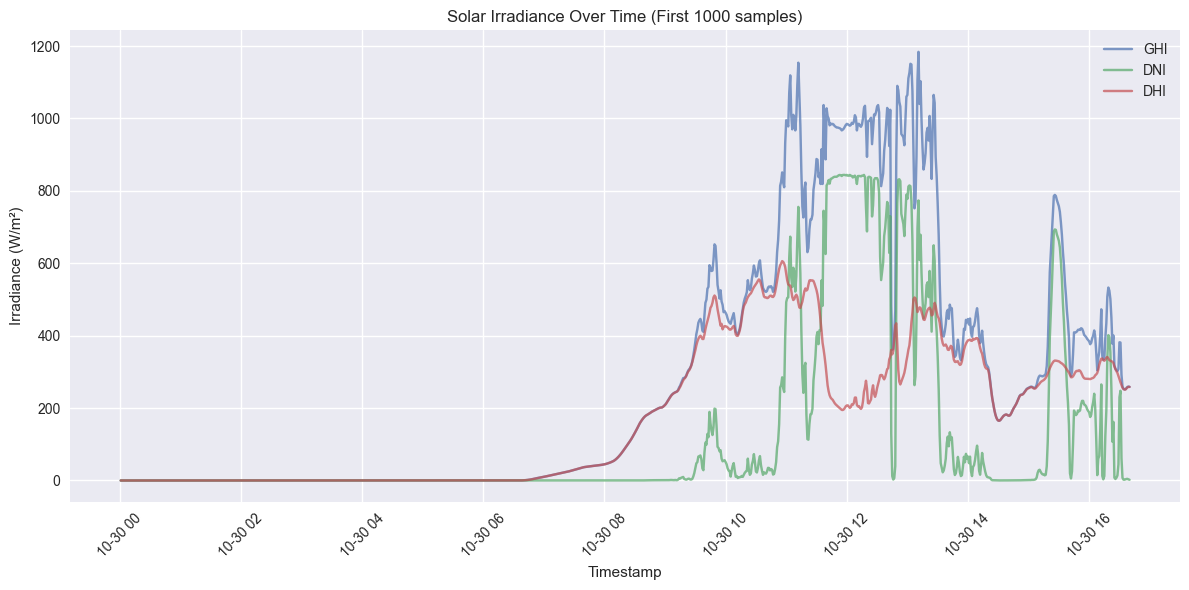

In [10]:
print("=== TIME SERIES ANALYSIS ===")

# Create a sample of data for plotting (first 1000 points for clarity)
sample_df = df.head(1000).copy()

plt.figure(figsize=(12, 6))
plt.plot(sample_df['Timestamp'], sample_df['GHI'], label='GHI', alpha=0.7)
plt.plot(sample_df['Timestamp'], sample_df['DNI'], label='DNI', alpha=0.7)
plt.plot(sample_df['Timestamp'], sample_df['DHI'], label='DHI', alpha=0.7)
plt.title('Solar Irradiance Over Time (First 1000 samples)')
plt.xlabel('Timestamp')
plt.ylabel('Irradiance (W/m²)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== ADVANCED TIME SERIES PATTERNS ===


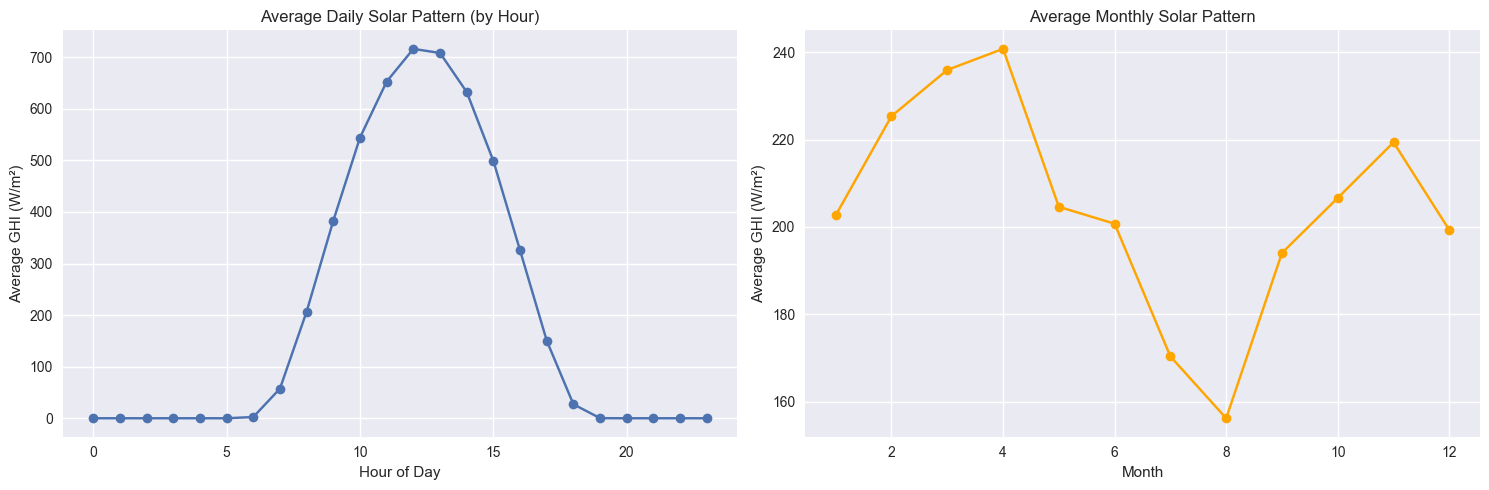

In [11]:
# === ADVANCED TIME SERIES PATTERNS ===
print("=== ADVANCED TIME SERIES PATTERNS ===")

# Extract time components for deeper analysis
df['Hour'] = df['Timestamp'].dt.hour
df['Month'] = df['Timestamp'].dt.month

# Daily pattern (average by hour)
daily_pattern = df.groupby('Hour')['GHI'].mean()
# Monthly pattern  
monthly_pattern = df.groupby('Month')['GHI'].mean()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Daily trend
axes[0].plot(daily_pattern.index, daily_pattern.values, marker='o')
axes[0].set_title('Average Daily Solar Pattern (by Hour)')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Average GHI (W/m²)')
axes[0].grid(True)

# Monthly trend
axes[1].plot(monthly_pattern.index, monthly_pattern.values, marker='o', color='orange')
axes[1].set_title('Average Monthly Solar Pattern')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average GHI (W/m²)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

#### Correlation Analysis & Cleaning Impact

=== CORRELATION ANALYSIS ===


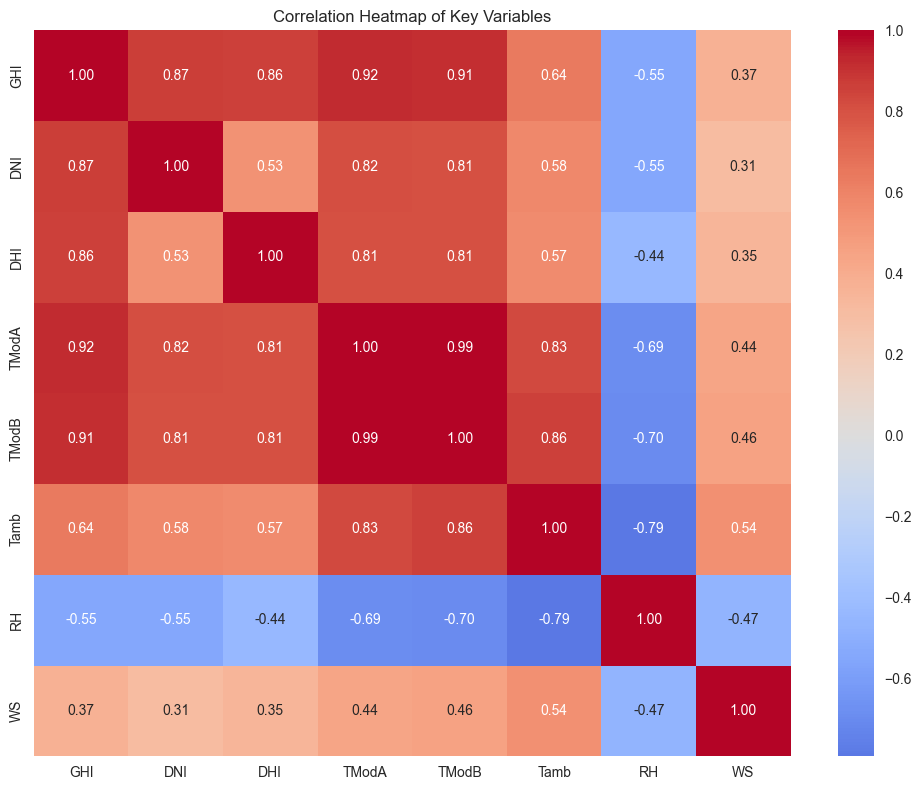

In [12]:
print("=== CORRELATION ANALYSIS ===")

# Select columns for correlation analysis
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH', 'WS']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Key Variables')
plt.tight_layout()
plt.show()

=== CLEANING IMPACT ANALYSIS ===
Average Module Readings by Cleaning Status:
                ModA        ModB
Cleaning                        
0         206.578599  198.038150
1         273.309252  277.231102


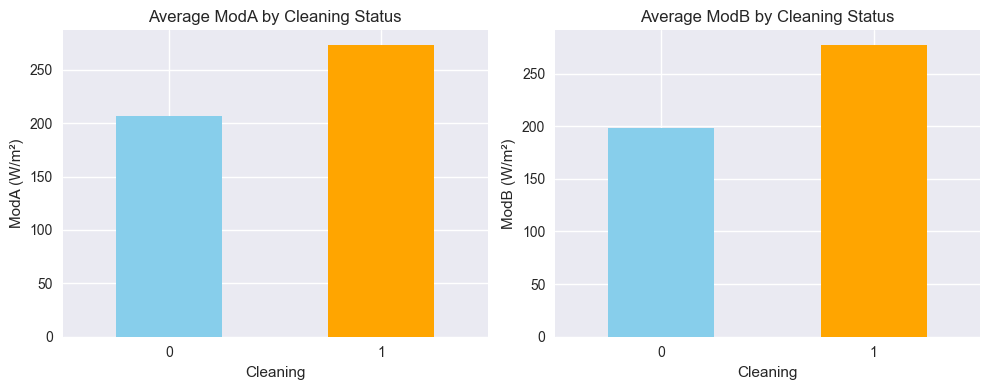

In [13]:
print("=== CLEANING IMPACT ANALYSIS ===")

# Group by Cleaning flag and compare ModA & ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

print("Average Module Readings by Cleaning Status:")
print(cleaning_impact)

# Plot the comparison
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
cleaning_impact['ModA'].plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average ModA by Cleaning Status')
plt.ylabel('ModA (W/m²)')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
cleaning_impact['ModB'].plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average ModB by Cleaning Status')
plt.ylabel('ModB (W/m²)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

#### Distribution Analysis

=== DISTRIBUTION ANALYSIS ===


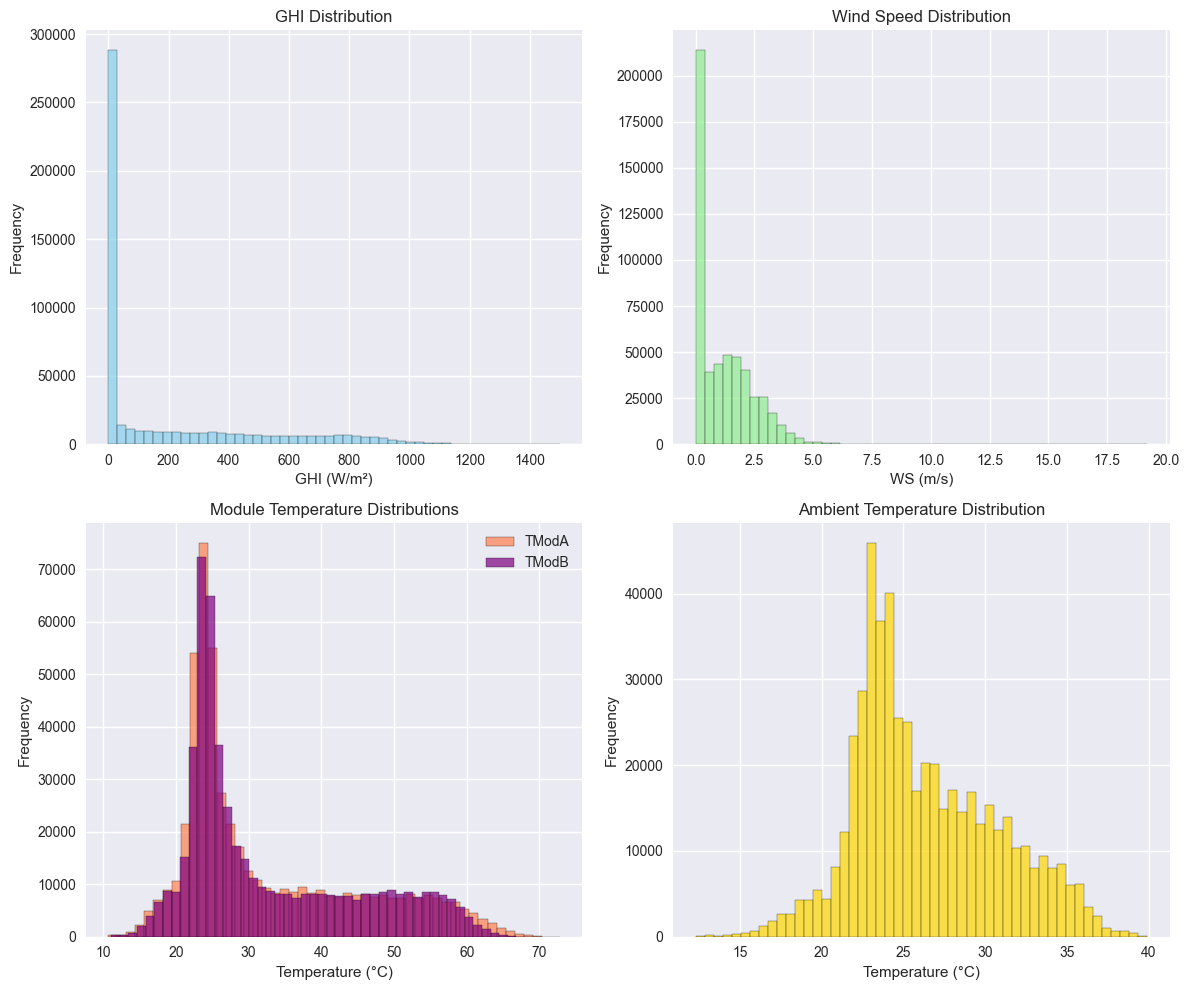

In [14]:
print("=== DISTRIBUTION ANALYSIS ===")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# GHI Distribution
axes[0,0].hist(df['GHI'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('GHI Distribution')
axes[0,0].set_xlabel('GHI (W/m²)')
axes[0,0].set_ylabel('Frequency')

# Wind Speed Distribution
axes[0,1].hist(df['WS'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Wind Speed Distribution')
axes[0,1].set_xlabel('WS (m/s)')
axes[0,1].set_ylabel('Frequency')

# Module Temperature Comparison
axes[1,0].hist(df['TModA'], bins=50, alpha=0.7, color='coral', label='TModA', edgecolor='black')
axes[1,0].hist(df['TModB'], bins=50, alpha=0.7, color='purple', label='TModB', edgecolor='black')
axes[1,0].set_title('Module Temperature Distributions')
axes[1,0].set_xlabel('Temperature (°C)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()

# Ambient Temperature Distribution
axes[1,1].hist(df['Tamb'], bins=50, alpha=0.7, color='gold', edgecolor='black')
axes[1,1].set_title('Ambient Temperature Distribution')
axes[1,1].set_xlabel('Temperature (°C)')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

=== TEMPERATURE & HUMIDITY INFLUENCE ===


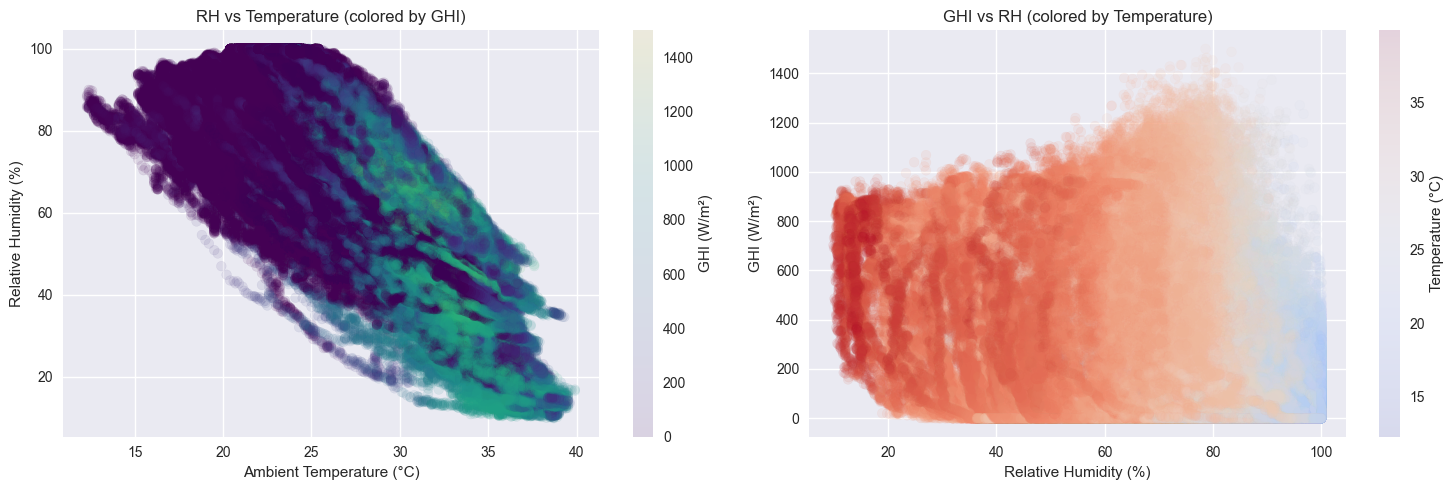

Correlation RH vs Tamb: -0.792
Correlation RH vs GHI: -0.549


In [15]:
# === TEMPERATURE & HUMIDITY INFLUENCE ===
print("=== TEMPERATURE & HUMIDITY INFLUENCE ===")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# RH vs Temperature
scatter1 = axes[0].scatter(df['Tamb'], df['RH'], alpha=0.1, c=df['GHI'], cmap='viridis')
axes[0].set_xlabel('Ambient Temperature (°C)')
axes[0].set_ylabel('Relative Humidity (%)')
axes[0].set_title('RH vs Temperature (colored by GHI)')
plt.colorbar(scatter1, ax=axes[0], label='GHI (W/m²)')

# RH vs Solar Radiation
scatter2 = axes[1].scatter(df['RH'], df['GHI'], alpha=0.1, c=df['Tamb'], cmap='coolwarm')
axes[1].set_xlabel('Relative Humidity (%)')
axes[1].set_ylabel('GHI (W/m²)')
axes[1].set_title('GHI vs RH (colored by Temperature)')
plt.colorbar(scatter2, ax=axes[1], label='Temperature (°C)')

plt.tight_layout()
plt.show()

# Correlation values
print(f"Correlation RH vs Tamb: {df['RH'].corr(df['Tamb']):.3f}")
print(f"Correlation RH vs GHI: {df['RH'].corr(df['GHI']):.3f}")

=== BUBBLE CHART ANALYSIS ===


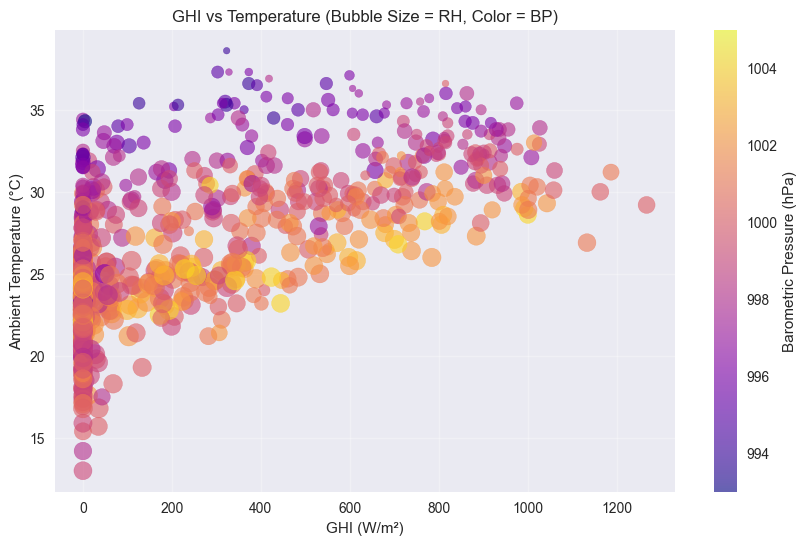

In [16]:
print("=== BUBBLE CHART ANALYSIS ===")

# Sample the data to make the bubble chart readable
sample_df = df.sample(n=1000, random_state=42)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(sample_df['GHI'], sample_df['Tamb'], 
                     s=sample_df['RH']*2,  # Bubble size based on RH
                     alpha=0.6, c=sample_df['BP'], cmap='plasma')

plt.xlabel('GHI (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('GHI vs Temperature (Bubble Size = RH, Color = BP)')
plt.colorbar(scatter, label='Barometric Pressure (hPa)')
plt.grid(True, alpha=0.3)
plt.show()

#### Save Cleaned Data

In [17]:
print("=== SAVE CLEANED DATA ===")

# Save cleaned dataset
cleaned_filepath = '../data/sierra_leone_clean.csv'
df.to_csv(cleaned_filepath, index=False)
print(f"Cleaned data saved to: {cleaned_filepath}")
print(f"Final dataset shape: {df.shape}")

# Verify the file was created
import glob
print("Files in data directory:", glob.glob('data/*.csv'))

=== SAVE CLEANED DATA ===
Cleaned data saved to: ../data/sierra_leone_clean.csv
Final dataset shape: (525600, 20)
Files in data directory: []
